## Heart Disease Prediction



### Context :
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Attributes :

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

__Dataset URL__ https://www.kaggle.com/ronitf/heart-disease-uci

i'll be using ML to predict whether any person is suffering from heart disease 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.cm import rainbow   #Builtin colormaps, colormap handling utilities
from matplotlib import rcParams     # An instance of RcParams for handling default Matplotlib values
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# no NaN and no object 

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

<AxesSubplot:>

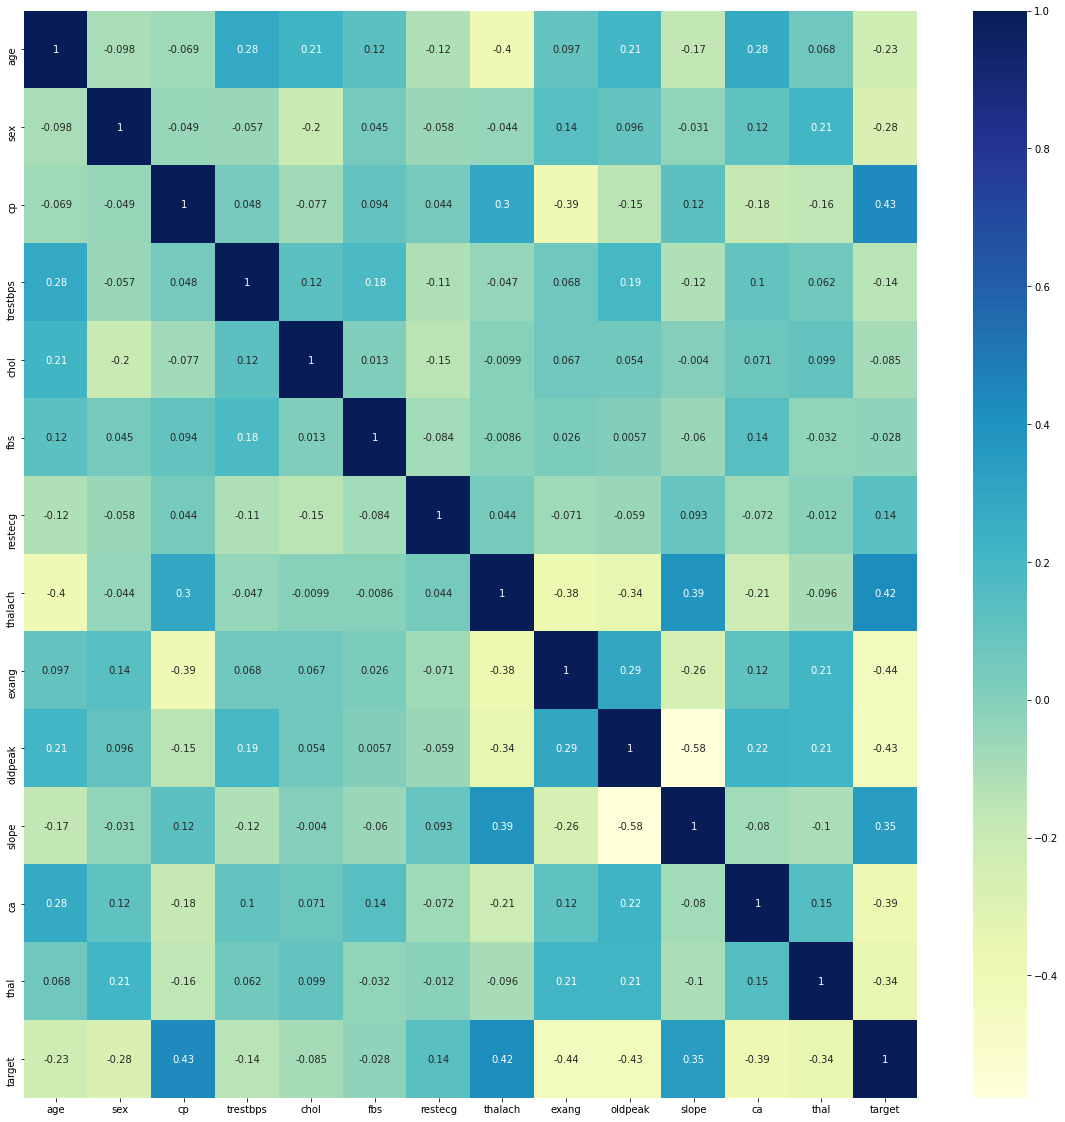

In [15]:
#get correlations of each features in dateframe
corr_matrix = df.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))

#plot heatMap
sns.heatmap(df[top_corr_features].corr(),annot= True, cmap = 'YlGnBu')

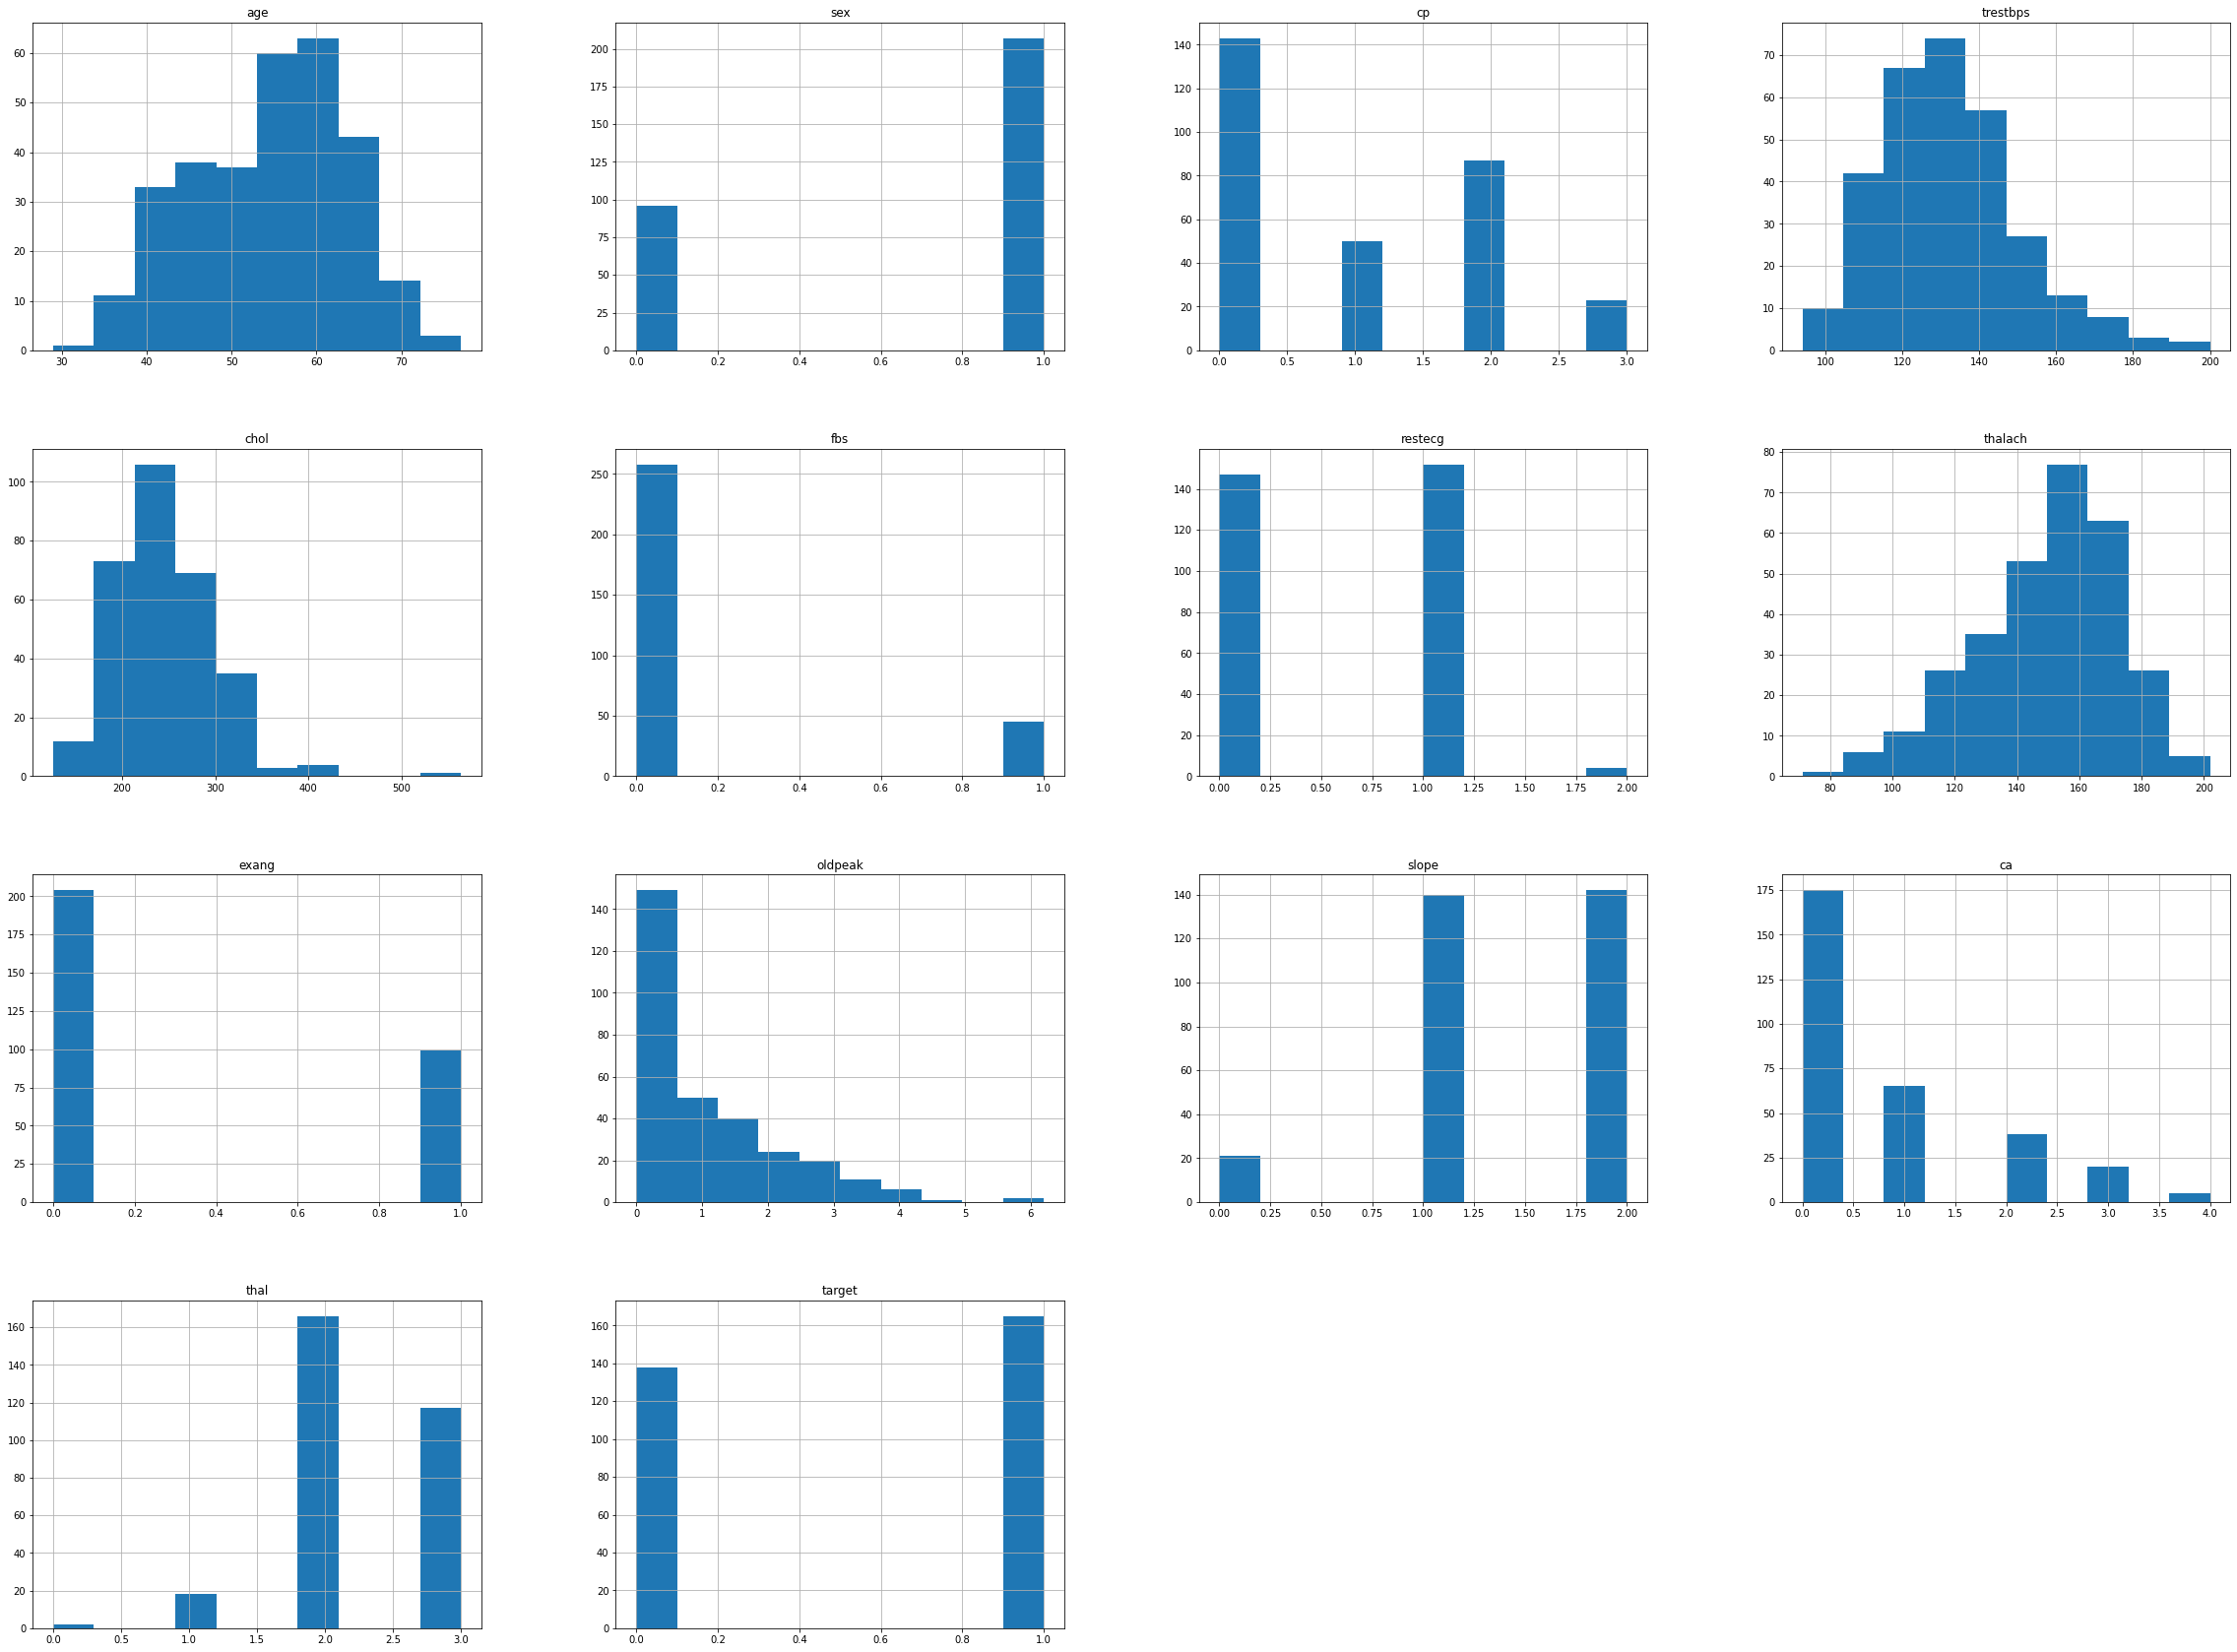

In [22]:
df.hist(figsize=(40,30))
plt.show()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. 

<AxesSubplot:xlabel='target', ylabel='count'>

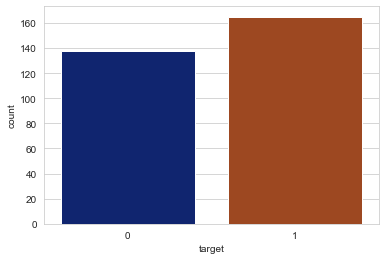

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette = 'dark')

## Data Processing 

I need to convert some categorical variables into dummy variables and scale all the values before training the ML models. 

In [26]:
# first let convert categorical features 
df2 = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 
                                   'restecg', 'exang', 'slope', 'ca', 'thal'])

In [27]:
df2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [29]:
# second lets scale the others 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [30]:
df2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [32]:
# features  - traget 
X = df2.drop(['target'],axis =1)
y = df2['target']

## KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_score = list()

for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X,y , cv = 10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

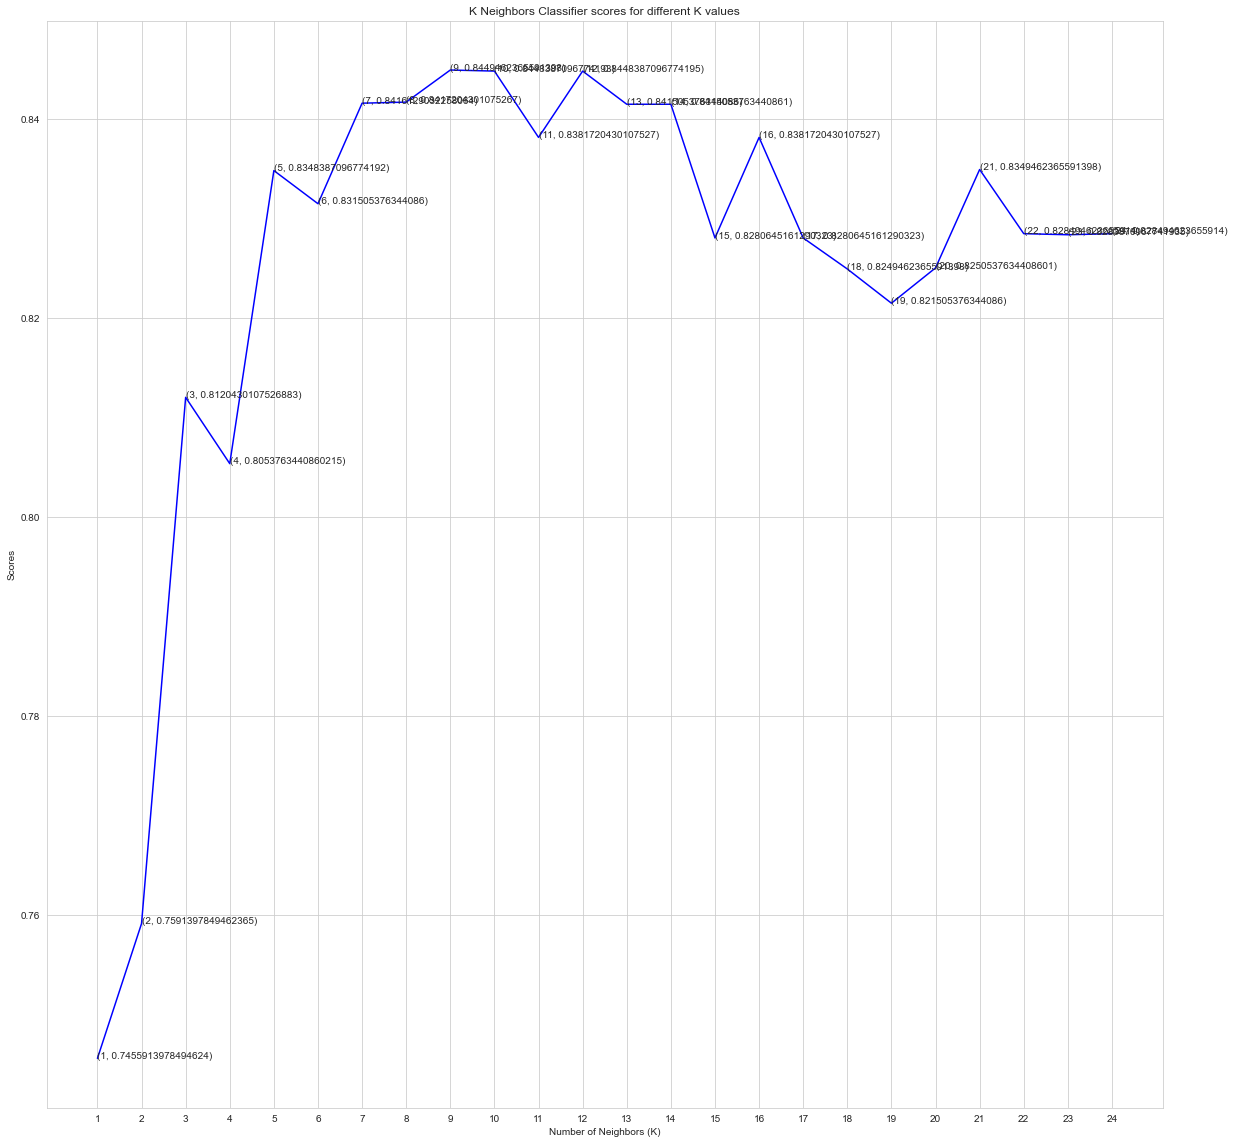

In [48]:
plt.figure(figsize=(20,20)) 

plt.plot([k for k in range(1,25)], knn_score , color = 'blue')

for i in range(1,25):
    #x,y,text
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
    
plt.xticks([i for i in range(1,25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [49]:
# as we can 12 gives us best accuracy 

knn2 = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn2 , X,y , cv = 10)
score.mean()

0.8448387096774195

## Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rf , X,y , cv = 10)
score.mean()

0.8117204301075269